In [4]:
include("laser_rate_equations.jl")
using Plots, StatsBase

We calculate the frequency response of the directly-modulated laser under strong modulation. This is done by integrating the system for different modulation frequencies and computing the Fourier components of the optical intensity. With high modulation index (m = 150%), we observe nonlinear effects including harmonic generation, so we analyze both the fundamental frequency component and its subharmonic.

In [27]:
r = 2 # normalized bias [u.a.]
m = 1.5 # modulation index [u.a.]
f0 = 10e9 # modulation frequncy [Hz]
τp = 5e-12 # Carrier lifetime [s]
τc = 180e-12 # Photon lifetime [s]
α = 3.8 # Linewidth enhancement factor
ϵ = τp/τc # Lifetime ratio

Fs = (1:0.1:12)*1e9 # Frequency vector

Iw1 = [] # Optical intensity vector with respect to frequency
Iw_half = [] # Optical intensity vector with respect to subharmonic (fm/2)
Iw2 = [] # Optical intensity vector with respect to 2*fm
Iw3 = [] # Optical intensity vector with respect to 3*fm

for fi in Fs
    plas = r, m, fi, τp, τc, α
    Np = 100 # number of periods to capture
    ti = 200/fi  # capture signal after few oscillations to avoid transient regime
    tf = ti + Np/fi
    N = 2^16

    E, _, t = integrate(plas, ti,tf, N);
    t = t .- t[1]

    I = abs2.(E) # intensity waveform

    c1 = 2*mean(I .* cis.(2π*fi*t)) # Fourier complex amplitude component at fi
    c_half = 2*mean(I .* cis.(π*fi*t)) # Fourier complex amplitude component at fi/2
    c2 = 2*mean(I.*cis.(4π*fi*t)) # Fourier complex amplitude component at 2*fi
    c3 = 2*mean(I.*cis.(6π*fi*t)) # Fourier complex amplitude component at 3*fi
    append!(Iw1, abs.(c1)) # Fourier component norm at fi
    append!(Iw_half, abs.(c_half)) # Fourier component norm at fi/2
    append!(Iw2, abs.(c2)) # Fourier component norm at 2*fi
    append!(Iw3, abs.(c3)) # Fourier component norm at 3*fi
end


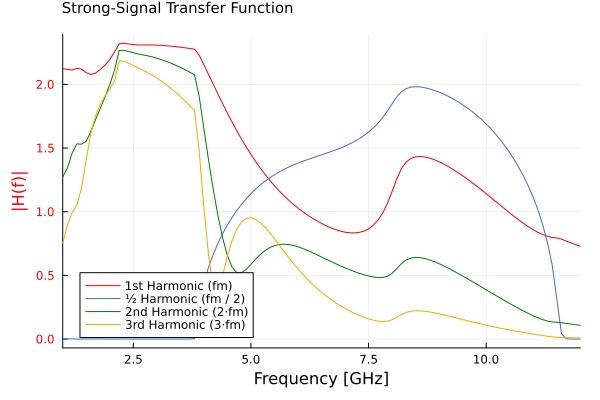

In [28]:
default() # reset plot defaults

begin
# Set plot defaults for better appearance
default(titleloc=:left)

# Main plot for the harmonics
plot(Fs/1e9, Iw1,
     color=:red,
     label="1st Harmonic (fm)",
     legendfontsize=8)

plot!(Fs/1e9, Iw_half,
      color=:royalblue,
    label="½ Harmonic (fm / 2)")

plot!(Fs/1e9, Iw2,
      color=:green,
      label="2nd Harmonic (2·fm)")

plot!(Fs/1e9, Iw3,
      color=:orange,
      label="3rd Harmonic (3·fm)")

ylabel!("|H(f)|", fontsize=8)
xlabel!("Frequency [GHz]", fontsize=8)

plot!(yguidefontcolor=:red,
      ytickfontcolor=:red,
      margin=3Plots.mm,
      xlims=(minimum(Fs)/1e9, maximum(Fs)/1e9),
      legend=:bottomleft)

plot!(title="Strong-Signal Transfer Function",
      titlefontsize=10)
end


With high modulation index (m = 150%), we observe significant nonlinear effects that are not captured by the linear small-signal theory. The harmonics plot reveals the nonlinear distortion characteristics of the laser under strong modulation conditions.